# Graph Visualizations i.e. Network Analysis


Networks, a.k.a graphs are useful modelling tool to model complex relational problems.

Networks are comprised of two main entities:
* Nodes: commonly represented as circles. In the academic literature, nodes are also known as "vertices"
* Edges: commonly represented as lines between circles

Edges denotes relationships between the nodes.

In a network, if two nodes are joined together by an edge, then they are neighbors of one another.

There are generally two types of networks - directed and undirected. In undirected networks, edges do not have a directionality associated with them. In directed networks, they do.


## Examples of networks
* Undirected network
    * Facebook's network: Individuals are nodes, edges are drawn between individuals who are FB friends with one another
* Directed Network
    * Air traffic network: Airports are nodes, flights between airports are the edges

# Network Analysis & Networkx

In this notebook, we will work with a social network of seventh graders, in which nodes are individual students, and edges represent their relationships. Edges between individuals show how often the seventh graders indicated other seventh graders as their favourite.

Data credit: http://konect.uni-koblenz.de/networks/moreno_seventh

## Data Representation

In the `networkx` implementation, graph objects store their data in dictionaries. 

Nodes are part of the attribute `Graph.node`, which is a dictionary where the key is the node ID and the values are a dictionary of attributes. 

Edges are part of the attribute `Graph.edge`, which is a nested dictionary. Data are accessed as such: `G.edge[node1, node2]['attr_name']`.

Because of the dictionary implementation of the graph, any hashable object can be a node. This means strings and tuples, but not lists and sets.

## Load Data

In [1]:
try:  # Python 3.x
    import urllib.request as urllib
except ImportError:  # Python 2.x
    import urllib
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read('football.txt').decode()  # read info file
gml = zf.read('football.gml').decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split('\n')[1:]
G = nx.parse_gml(gml)  # parse gml data

print(txt)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)



## Basic Network Statistics

Let's first understand how the network is represented.

In [2]:
# Who are represented in the network?
list(G.nodes())

['BrighamYoung',
 'FloridaState',
 'Iowa',
 'KansasState',
 'NewMexico',
 'TexasTech',
 'PennState',
 'SouthernCalifornia',
 'ArizonaState',
 'SanDiegoState',
 'Baylor',
 'NorthTexas',
 'NorthernIllinois',
 'Northwestern',
 'WesternMichigan',
 'Wisconsin',
 'Wyoming',
 'Auburn',
 'Akron',
 'VirginiaTech',
 'Alabama',
 'UCLA',
 'Arizona',
 'Utah',
 'ArkansasState',
 'NorthCarolinaState',
 'BallState',
 'Florida',
 'BoiseState',
 'BostonCollege',
 'WestVirginia',
 'BowlingGreenState',
 'Michigan',
 'Virginia',
 'Buffalo',
 'Syracuse',
 'CentralFlorida',
 'GeorgiaTech',
 'CentralMichigan',
 'Purdue',
 'Colorado',
 'ColoradoState',
 'Connecticut',
 'EasternMichigan',
 'EastCarolina',
 'Duke',
 'FresnoState',
 'OhioState',
 'Houston',
 'Rice',
 'Idaho',
 'Washington',
 'Kansas',
 'SouthernMethodist',
 'Kent',
 'Pittsburgh',
 'Kentucky',
 'Louisville',
 'LouisianaTech',
 'LouisianaMonroe',
 'Minnesota',
 'MiamiOhio',
 'Vanderbilt',
 'MiddleTennesseeState',
 'Illinois',
 'MississippiState',
 

### Exercise

Can you write a single line of code that returns the number of nodes in the graph? (1 min.)

In [3]:
len(G.nodes())

115

Let's now figure out who is connected to who in the network

In [4]:
# Who is connected to who in the network?
list(G.edges())

[('BrighamYoung', 'FloridaState'),
 ('BrighamYoung', 'NewMexico'),
 ('BrighamYoung', 'SanDiegoState'),
 ('BrighamYoung', 'Wyoming'),
 ('BrighamYoung', 'Utah'),
 ('BrighamYoung', 'Virginia'),
 ('BrighamYoung', 'Syracuse'),
 ('BrighamYoung', 'ColoradoState'),
 ('BrighamYoung', 'MississippiState'),
 ('BrighamYoung', 'UtahState'),
 ('BrighamYoung', 'AirForce'),
 ('BrighamYoung', 'NevadaLasVegas'),
 ('FloridaState', 'NorthCarolinaState'),
 ('FloridaState', 'Florida'),
 ('FloridaState', 'Virginia'),
 ('FloridaState', 'GeorgiaTech'),
 ('FloridaState', 'Duke'),
 ('FloridaState', 'Louisville'),
 ('FloridaState', 'NorthCarolina'),
 ('FloridaState', 'MiamiFlorida'),
 ('FloridaState', 'Clemson'),
 ('FloridaState', 'WakeForest'),
 ('FloridaState', 'Maryland'),
 ('Iowa', 'KansasState'),
 ('Iowa', 'PennState'),
 ('Iowa', 'Northwestern'),
 ('Iowa', 'WesternMichigan'),
 ('Iowa', 'Wisconsin'),
 ('Iowa', 'OhioState'),
 ('Iowa', 'Minnesota'),
 ('Iowa', 'Illinois'),
 ('Iowa', 'IowaState'),
 ('Iowa', 'Nebra

### Exercise

Can you write a single line of code that returns the number of relationships represented?

In [5]:
len(G.edges())

613

## Concept

A **network**, more technically known as a **graph**, is comprised of:

- a set of nodes
- joined by a set of edges

They can be represented as two lists:

1. A **node list**: a list of 2-tuples where the first element of each tuple is the representation of the node, and the second element is a dictionary of metadata associated with the node.
2. An **edge list**: a list of 3-tuples where the first two elements are the nodes that are connected together, and the third element is a dictionary of metadata associated with the edge.

Since this is a network of games, there'll be attributes for each team, such as the conference they played.

In [6]:
# Let's get a list of nodes with their attributes.
list(G.nodes(data=True))[0:5]

[('BrighamYoung', {'value': 7}),
 ('FloridaState', {'value': 0}),
 ('Iowa', {'value': 2}),
 ('KansasState', {'value': 3}),
 ('NewMexico', {'value': 7})]

Edges can also store attributes in their attribute dictionary

In [7]:
list(G.edges(data=True))[0:5]

[('BrighamYoung', 'FloridaState', {}),
 ('BrighamYoung', 'NewMexico', {}),
 ('BrighamYoung', 'SanDiegoState', {}),
 ('BrighamYoung', 'Wyoming', {}),
 ('BrighamYoung', 'Utah', {})]

## Drawing Graphs

As illustrated above, we can draw graphs using the `nx.draw()` function. The most popular format for drawing graphs is the **node-link diagram**.

Nodes are circles and lines are edges. Nodes more tightly connected with one another are clustered together. Large graphs end up looking like hairballs.

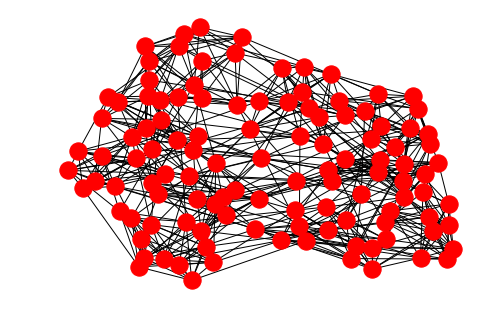

In [8]:
nx.draw(G)

If the network is small enough to visualize, and the node labels are small enough to fit in a circle, then you can use the `with_labels=True` argument.

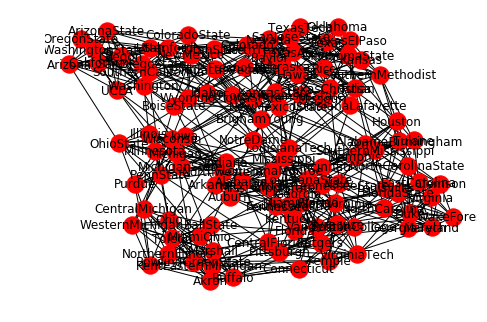

In [9]:
nx.draw(G, with_labels=True)

However, note that if the number of nodes in the graph gets really large, node-link diagrams can begin to look like massive hairballs. This is undesirable for graph visualization.

## Matrix Plot

Instead, we can use a **matrix** to represent them. The nodes are on the x- and y- axes, and a filled square represent an edge between the nodes. This is done by using the `MatrixPlot` object from `nxviz`.

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


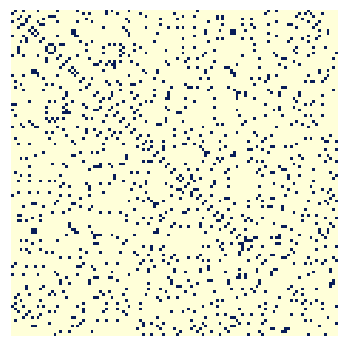

In [10]:
from nxviz import MatrixPlot

m = MatrixPlot(G)
m.draw()
plt.show()

## Arc Plot

The Arc Plot is the basis of the next set of rational network visualizations.

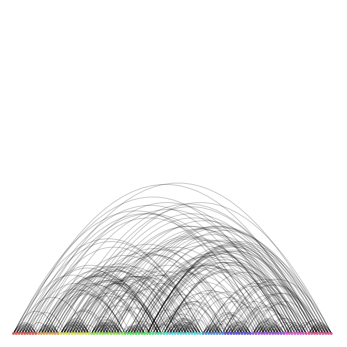

In [11]:
from nxviz import ArcPlot

a = ArcPlot(G, node_color='value', node_grouping='value')
a.draw()

## Circos Plot

Let's try another visualization, the **Circos plot**. We can order the nodes in the Circos plot according to the node ID, but any other ordering is possible as well. Edges are drawn between two nodes.

Credit goes to Justin Zabilansky (MIT) for the implementation, Jon Charest for subsequent improvements, and `nxviz` contributors for further development.

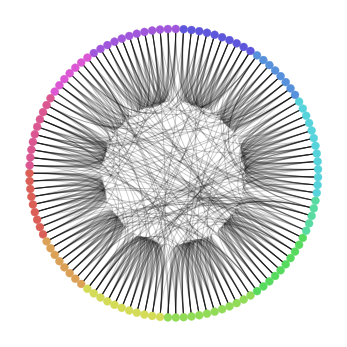

In [12]:
from nxviz import CircosPlot

c = CircosPlot(G, node_color='value', node_grouping='value')
c.draw()
plt.savefig('test.png', dpi=300)

This visualization helps us highlight nodes that there are poorly connected.

# PyGraphistry: Explore Relationships

[PyGraphistry](https://github.com/graphistry/pygraphistry#demo-of-friendship-communities-on-facebook) is a visual graph analystics library to extract, transform, and load big graphs. It supports unusually large graphs for interactive visualization. The client's custom WebGL rendering engine renders up to 8MM nodes and edges at a time, and most older client GPUs smoothly support somewhere between 100K and 1MM elements. The serverside OpenCL analytics engine supports even bigger graphs.

Have fun exploring [PyGraphistry](http://labs.graphistry.com/graph/graph.html?dataset=Facebook&usertag=github&info=true&static=true&contentKey=Facebook_Github_Demo&play=7000&center=false&menu=true&goLive=false&left=-2.02e%204&right=1.51e%204&top=-1.07e%204&bottom=9.15e%203&legend=%7B%22nodes%22%3A%20%22People%20(Names%20are%20fake).%3Cbr%2F%3E%20Color%20indicates%20community%20and%20size%20shows%20popularity.%22%2C%20%22edges%22%3A%20%22Friendships%22%2C%20%22subtitle%22%3A%20%22%3Cp%3ECreate%20your%20own%20visualizations%20with%20%3Ca%20href%3D%5C%22https%3A%2F%2Fgithub.com%2Fgraphistry%2Fpygraphistry%2F%5C%22%3EPyGraphistry%3C%2Fa%3E.%3C%2Fp%3E%22%2C%20%22title%22%3A%20%22%3Ch3%3EFacebook%20Friendships%20(Read-only%20Mode)%3C%2Fh3%3E%22%7D&workbook=44ad88bd8e14bba3)

In [17]:
import graphistry
graphistry.register(key='YOUR_API_KEY_HERE')
import pandas as pd

edges = pd.read_csv('data/facebook_combined.txt', sep=' ', names=['src', 'dst'])
graphistry.bind(source='src', destination='dst').plot(edges)

ValueError: API key not set explicitly in `register()` or available at GRAPHISTRY_API_KEY

These slides/demos are based on concepts from: https://github.com/ericmjl/Network-Analysis-Made-Simple.